In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [7]:
'''
We can also write L(w) as: L(w) = 1/2N*<e,e>
'''

def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    
    e = y - np.dot(tx,w)
    loss = np.dot(e,e)/(2*len(y))
    
    return loss
    # ***************************************************
    

w = np.array([1, 2])

print(compute_loss(y, tx, w))

2694.483365887085


# 2. Grid Search

Fill in the function `grid_search()` below:

In [8]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    
    losses = np.zeros((len(grid_w0), len(grid_w1)))
    
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            w = np.array([grid_w0[i],grid_w1[j]])
            losses[i][j] = compute_loss(y, tx, w)
    
    return losses
    
    # ***************************************************
    

Let us play with the grid search demo now!

Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.008 seconds


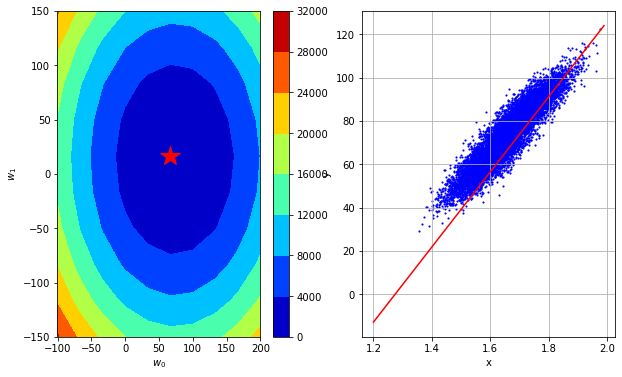

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    
    e = y - np.dot(tx,w)
    grad = -np.dot(tx.T, e)/len(e)
    
    return grad
    
    # ***************************************************

w = np.array([73.29392200210519,13.479712434989048])

print(compute_gradient(y, tx, w))

[ 2.00088834e-15 -4.61852778e-17]


Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        # ***************************************************

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        
        w = w - gamma*grad
        
        # ***************************************************

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [12]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759168, w0=51.30574540147361, w1=9.435798704492274
GD iter. 1/49: loss=265.3024621089606, w0=66.69746902191571, w1=12.266538315840002
GD iter. 2/49: loss=37.87837955044127, w0=71.31498610804834, w1=13.11576019924433
GD iter. 3/49: loss=17.410212120174478, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=15.386020684743528, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638301, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=15.3858879656522, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305071, w1=13.479705271317192
GD it

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [14]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    
    grad = compute_gradient(y, tx, w)
    
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    
    return grad


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        
        loss = compute_loss(y, tx, w)
        losses.append(loss)
        
        mini_y, mini_tx = next(batch_iter(y, tx, batch_size))
        D = len(mini_y)
        grad = compute_stoch_gradient(mini_y, mini_tx, w)
        
        w = w - gamma*grad
        ws.append(w)
        
        # TODO: implement stochastic gradient descent.
        # ***************************************************

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [15]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2792.236712759168, w0=6.635842037467672, w1=-1.9175345261503454
SGD iter. 1/49: loss=2355.5733071459917, w0=12.868895790433179, w1=-1.376399042664544
SGD iter. 2/49: loss=1951.3298083276875, w0=18.85323418284242, w1=0.07698287912408697
SGD iter. 3/49: loss=1587.09671275987, w0=24.218088472598687, w1=1.166066362844267
SGD iter. 4/49: loss=1295.4175459717692, w0=29.334292146628822, w1=2.4598627294757063
SGD iter. 5/49: loss=1042.3289601501253, w0=33.295420354603074, w1=2.656058415238979
SGD iter. 6/49: loss=873.9016980610695, w0=37.23679707889088, w1=3.895705919280303
SGD iter. 7/49: loss=711.370607179544, w0=40.37578233223333, w1=2.76808851026338
SGD iter. 8/49: loss=614.5572910838023, w0=43.67110478715174, w1=3.872150437764322
SGD iter. 9/49: loss=500.2941615093585, w0=46.643201727449096, w1=4.703437926929396
SGD iter. 10/49: loss=409.0278305682207, w0=49.334311668397206, w1=5.780972983557913
SGD iter. 11/49: loss=332.05264611090354, w0=51.880775255783455, w1=7.916

In [3]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

NameError: name 'sgd_ws' is not defined

# 5. Effect of Outliers and MAE Cost Function

In [44]:
# Subsampling

import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers

height, weight, gender = load_data(sub_sample=True, add_outlier=False)

# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [45]:
y.shape, tx.shape

((200,), (200, 2))

In [46]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

# **************************************************

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2829.2722244384163, w0=51.54259072181181, w1=10.132993413506076
GD iter. 1/49: loss=267.05002587794183, w0=67.00536793835533, w1=13.172891437557823
GD iter. 2/49: loss=36.450028007500265, w0=71.64420110331838, w1=14.084860844773322
GD iter. 3/49: loss=15.696028199160637, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=13.82816821641008, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=13.644931152102245, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=13.643569482174819, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=13.643435902354936, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=13.643434909697557, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=13.643434820358397, w0=73.6322333285226, w1=14.4756971834

In [47]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [48]:
# Subsampling and adding outliers.

import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers

height, weight, gender = load_data(sub_sample=True, add_outlier=True)

# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [49]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

# **************************************************

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358533, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=318.28212470159497, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=88.6423556165126, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=65.93222021235334, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225756, w1=11.034889001593537
GD ite

In [50]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [51]:
def compute_loss_mae(y, tx, w):
    """Calculate the loss using either MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MAE
    
    e = y - np.dot(tx,w)
    loss = 0
    for i in range(len(y)):
        if e[i] > 0: loss += e[i]
        elif e[i] < 0: loss += -e[i]
    
    loss = loss/(len(y))
    
    return loss
    # **************************************************  

w = np.array([1, 2])

print(compute_loss_mae(y, tx, w))

73.06780585492638


In [52]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    
    N = len(y)
    w_final = np.array([0, 0], float)
    e = y - np.dot(tx,w)
    
    for i in range(N):
        if e[i] > 0:
            w_final -= tx[i]
        elif e[i] < 0:
            w_final += tx[i]
    
    w_final = w_final/N
            
    return w_final
    # **************************************************

w = np.array([1, 2])

print(compute_subgradient_mae(y, tx, w))

[-1.0000000e+00 -8.7278919e-16]


In [53]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        
        sub_grad = compute_subgradient_mae(y, tx, w)
        loss = compute_loss_mae(y, tx, w)
        
        # ***************************************************
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        
        w = w - gamma*sub_grad
        
        # ***************************************************
        
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [54]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492632, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=73.36780585492639, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=72.66780585492634, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=71.96780585492641, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=71.26780585492642, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=70.56780585492632, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=69.86780585492639, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=69.16780585492634, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=68.46780585492641, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=67.76780585492642, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=67.0678058549263, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=66.36780585492639, w0=8.4, w1=7.331429193108857e-15
SubGD iter. 12

In [55]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [56]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        
        loss = compute_loss_mae(y, tx, w)
        losses.append(loss)
        
        mini_y, mini_tx = next(batch_iter(y, tx, batch_size))
        D = len(mini_y)
        grad = compute_subgradient_mae(mini_y, mini_tx, w)
        
        w = w - gamma*grad
        ws.append(w)
        
        # ***************************************************

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [57]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 50

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=74.06780585492632, w0=0.7, w1=-0.009560202806607652
SubSGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=-0.010599356814536363
SubSGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=0.0007198234357728549
SubSGD iter. 3/499: loss=71.9678058549264, w0=2.8, w1=0.09152385373737852
SubSGD iter. 4/499: loss=71.26780585492635, w0=3.5, w1=0.1425527322244746
SubSGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=0.19552320961521114
SubSGD iter. 6/499: loss=69.86780585492639, w0=4.9, w1=0.19304251172747744
SubSGD iter. 7/499: loss=69.16780585492641, w0=5.6000000000000005, w1=0.1814957648378508
SubSGD iter. 8/499: loss=68.46780585492637, w0=6.300000000000001, w1=0.15018477962780524
SubSGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=0.022549417913844766
SubSGD iter. 10/499: loss=67.06780585492636, w0=7.700000000000001, w1=-0.01333141910872724
SubSGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=-0.01458957588082795
SubSGD iter. 12/499:

In [58]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>